In [530]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn import metrics
import matplotlib.cm as cm
from yellowbrick.cluster import SilhouetteVisualizer
from sklearn.metrics import silhouette_samples, silhouette_score
import datetime
from scipy.spatial.distance import cdist

In [531]:
df = pd.read_csv('marketing_campaign.csv', sep='\t')
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [532]:
df['Income'].fillna(df['Income'].median(), inplace=True)

/var/folders/l4/47zklk7d4rjgncjhqhj9n7pw0000gn/T/ipykernel_71440/1959487941.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Income'].fillna(df['Income'].median(), inplace=True)


In [533]:
currentYear = datetime.datetime.now()
df['Age'] = currentYear.year - df['Year_Birth']


In [534]:
df['Marital_Status'] = df['Marital_Status'].replace(['Married', 'Together'], 'Relationship')
df['Marital_Status'] = df['Marital_Status'].replace(['Single', 'Divorced', 'Widow', 
                                                     'Alone', 'Absurd', 'YOLO'], 'Single')

In [535]:
df.drop(columns=['ID', 'Z_CostContact', 'Z_Revenue'], axis=1, inplace=True)

In [536]:
data = pd.DataFrame(df)
data['Dt_Customer'] = pd.to_datetime(data['Dt_Customer'], format='%d-%m-%Y')
complained = data[data['Complain'] == 1]
num_complained = complained.shape[0]
num_not_complained = data.shape[0] - num_complained

In [537]:
print("Total number of customers who complained:", num_complained)
print("Total number of customers who did not complain:", num_not_complained)

Total number of customers who complained: 21
Total number of customers who did not complain: 2219


In [538]:
df.rename(columns = {'MntWines':'wines','MntFruits':'fruits','MntMeatProducts':'meat','MntFishProducts':'fish','MntSweetProducts':'sweet','MntGoldProds':'gold','Year_Birth':'year_birth','Income':'income','Education':'education','Marital_Status':'marital_status'}, inplace = True)

In [539]:
df.describe()

,year_birth,income,Kidhome,Teenhome,Recency,wines,fruits,meat,fish,sweet,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Age
count,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000
mean,1968.805804,52237.975446,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,27.062946,...,5.790179,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,0.149107,55.194196
std,11.984069,25037.955891,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,41.280498,...,3.250958,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.356274,11.984069
min,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,28.000000
25%,1959.000000,35538.750000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,1.000000,...,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,47.000000
50%,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,8.000000,...,5.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,54.000000
75%,1977.000000,68289.750000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,33.000000,...,8.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,65.000000
max,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,263.000000,...,13.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,131.000000


In [540]:
Prod=["wines","fruits","meat","fish","sweet","gold"]
Prod_data = df[Prod].copy()
Prod_data.head()

,wines,fruits,meat,fish,sweet,gold
0,635,88,546,172,88,88
1,11,1,6,2,1,6
2,426,49,127,111,21,42
3,11,4,20,10,3,5
4,173,43,118,46,27,15


In [541]:
df2 = ["AcceptedCmp1" , "AcceptedCmp2", "AcceptedCmp3" , "AcceptedCmp4","AcceptedCmp5", 
                   "Response","NumWebVisitsMonth", "NumWebPurchases","NumCatalogPurchases",
                   "NumStorePurchases","NumDealsPurchases" , "Kidhome", "Teenhome"]
df_n=df.drop(columns=df2,axis=1)
df_n.head()

,year_birth,education,marital_status,income,Dt_Customer,Recency,wines,fruits,meat,fish,sweet,gold,Complain,Age
0,1957,Graduation,Single,58138.0,04-09-2012,58,635,88,546,172,88,88,0,67
1,1954,Graduation,Single,46344.0,08-03-2014,38,11,1,6,2,1,6,0,70
2,1965,Graduation,Relationship,71613.0,21-08-2013,26,426,49,127,111,21,42,0,59
3,1984,Graduation,Relationship,26646.0,10-02-2014,26,11,4,20,10,3,5,0,40
4,1981,PhD,Relationship,58293.0,19-01-2014,94,173,43,118,46,27,15,0,43


In [542]:

df_n['expenses'] = df['wines'] + df['fruits'] + df['meat'] + df['fish'] + df['sweet'] + df['gold']


In [543]:
cdf = df_n.drop(df[(df['year_birth'] < 1935)].index)
cdf

,year_birth,education,marital_status,income,Dt_Customer,Recency,wines,fruits,meat,fish,sweet,gold,Complain,Age,expenses
0,1957,Graduation,Single,58138.0,04-09-2012,58,635,88,546,172,88,88,0,67,1617
1,1954,Graduation,Single,46344.0,08-03-2014,38,11,1,6,2,1,6,0,70,27
2,1965,Graduation,Relationship,71613.0,21-08-2013,26,426,49,127,111,21,42,0,59,776
3,1984,Graduation,Relationship,26646.0,10-02-2014,26,11,4,20,10,3,5,0,40,53
4,1981,PhD,Relationship,58293.0,19-01-2014,94,173,43,118,46,27,15,0,43,422
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,1967,Graduation,Relationship,61223.0,13-06-2013,46,709,43,182,42,118,247,0,57,1341
2236,1946,PhD,Relationship,64014.0,10-06-2014,56,406,0,30,0,0,8,0,78,444
2237,1981,Graduation,Single,56981.0,25-01-2014,91,908,48,217,32,12,24,0,43,1241
2238,1956,Master,Relationship,69245.0,24-01-2014,8,428,30,214,80,30,61,0,68,843


In [544]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
cdf['education'] = label_encoder.fit_transform(cdf['education'])
cdf['marital_status'] = label_encoder.fit_transform(cdf['marital_status'])

In [545]:
cdf.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2237 entries, 0 to 2239
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   year_birth      2237 non-null   int64  
 1   education       2237 non-null   int64  
 2   marital_status  2237 non-null   int64  
 3   income          2237 non-null   float64
 4   Dt_Customer     2237 non-null   object 
 5   Recency         2237 non-null   int64  
 6   wines           2237 non-null   int64  
 7   fruits          2237 non-null   int64  
 8   meat            2237 non-null   int64  
 9   fish            2237 non-null   int64  
 10  sweet           2237 non-null   int64  
 11  gold            2237 non-null   int64  
 12  Complain        2237 non-null   int64  
 13  Age             2237 non-null   int64  
 14  expenses        2237 non-null   int64  
dtypes: float64(1), int64(13), object(1)
memory usage: 279.6+ KB


Text(0, 0.5, 'Inertia')

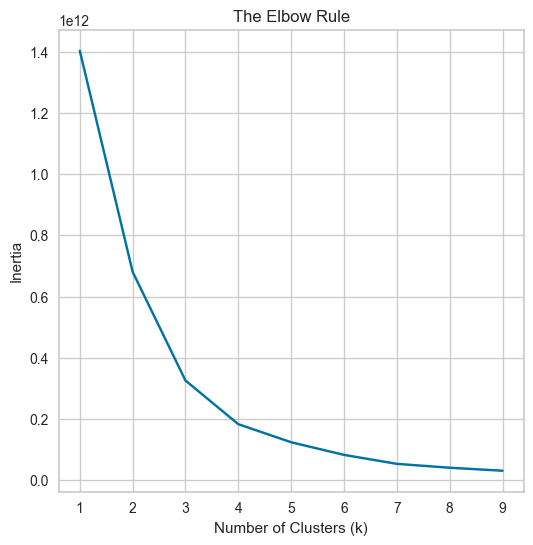

In [501]:
inertias = []
k_val = range(1,10)
features = ['year_birth', 'education', 'marital_status', 'income', 'expenses']

for k in k_val:
   model = KMeans(k, random_state=20, init='k-means++',n_init=10).fit(cdf[features])
   inertias.append(model.inertia_)


plt.figure(figsize=(6,6))    
plt.title("The Elbow Rule")
plt.plot(k_val, inertias)
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')

In [502]:
model = KMeans(n_clusters=4, random_state=10,n_init=10)
cluster_labels = model.fit_predict(cdf[features])
silhouette_avg = silhouette_score(cdf[features], cluster_labels)
print(silhouette_avg)

0.5441173530915822


In [503]:
model.predict(cdf[features])

array([1, 1, 0, ..., 1, 0, 1], dtype=int32)

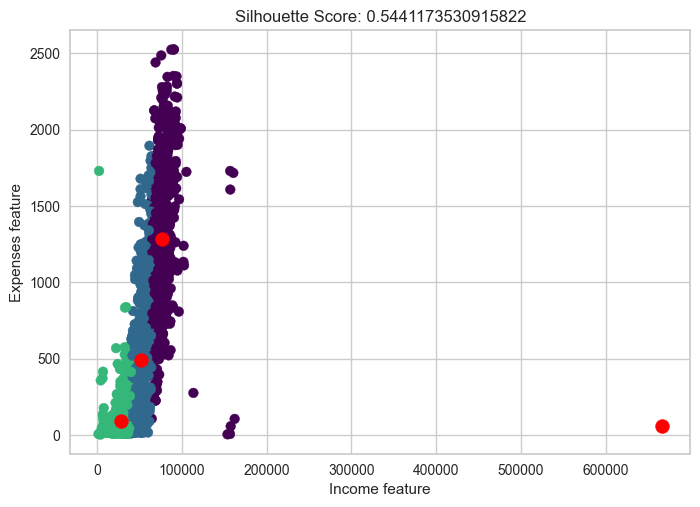

In [504]:
plt.scatter(cdf[features].iloc[:, 3], cdf[features].iloc[:, 4], c=cluster_labels, cmap='viridis')
plt.scatter(model.cluster_centers_[:, 3], model.cluster_centers_[:, 4], marker='o', c='red', s=100)
plt.title(f"Silhouette Score: {silhouette_avg}")
plt.xlabel("Income feature")
plt.ylabel("Expenses feature")
plt.show()

In [505]:
preds = model.predict(cdf[features])
clusters = cdf.copy()
clusters['Cluster'] = preds +1
cluster_size = dict(clusters['Cluster'].value_counts())

In [506]:
clusters.to_csv("clusters.csv")

In [507]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(model.labels_, cluster_labels)
cm

array([[688,   0,   0,   0],
       [  0, 810,   0,   0],
       [  0,   0, 738,   0],
       [  0,   0,   0,   1]])

In [508]:
User_input = pd.DataFrame([[1955, 'Basic', 'Relationship', 85296,0]], columns=['Year_Birth', 'Education', 'Marital_Status', 'Income','Expenses'])

In [546]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
User_input['Education'] = label_encoder.fit_transform(User_input['Education'])
User_input['Marital_Status'] = label_encoder.fit_transform(User_input['Marital_Status'])

KeyError: 'Education'

In [ ]:
pred_cluster = model.predict(User_input)[0]

In [510]:
clusters

,year_birth,education,marital_status,income,Dt_Customer,Recency,wines,fruits,meat,fish,sweet,gold,Complain,Age,expenses,Cluster
0,1957,2,1,58138.0,04-09-2012,58,635,88,546,172,88,88,0,67,1617,2
1,1954,2,1,46344.0,08-03-2014,38,11,1,6,2,1,6,0,70,27,2
2,1965,2,0,71613.0,21-08-2013,26,426,49,127,111,21,42,0,59,776,1
3,1984,2,0,26646.0,10-02-2014,26,11,4,20,10,3,5,0,40,53,3
4,1981,4,0,58293.0,19-01-2014,94,173,43,118,46,27,15,0,43,422,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,1967,2,0,61223.0,13-06-2013,46,709,43,182,42,118,247,0,57,1341,2
2236,1946,4,0,64014.0,10-06-2014,56,406,0,30,0,0,8,0,78,444,2
2237,1981,2,1,56981.0,25-01-2014,91,908,48,217,32,12,24,0,43,1241,2
2238,1956,3,0,69245.0,24-01-2014,8,428,30,214,80,30,61,0,68,843,1


In [276]:
import pickle
with open('kmeans_model.pkl', 'wb') as f:
    pickle.dump(model, f)

In [547]:
to_remove = ["Dt_Customer" , "Recency", "Complain" , "Age","wines","fruits","meat","fish","sweet","gold"]
test=cdf.drop(columns=to_remove,axis=1)

In [548]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2237 entries, 0 to 2239
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   year_birth      2237 non-null   int64  
 1   education       2237 non-null   int64  
 2   marital_status  2237 non-null   int64  
 3   income          2237 non-null   float64
 4   expenses        2237 non-null   int64  
dtypes: float64(1), int64(4)
memory usage: 104.9 KB


In [563]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

# Normalize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(test)

# Feature Engineering (if needed)

# Dimensionality Reduction
pca = PCA(n_components=2)  # Choose the number of components based on explained variance ratio
reduced_data = pca.fit_transform(scaled_data)

# KMeans Clustering
kmeans = KMeans(n_clusters=4, random_state=10,n_init=10)  
cluster_labels=kmeans.fit(reduced_data)



In [576]:
silhouette_avg = silhouette_score(reduced_data, cluster_labels)
silhouette_avg

0.21079395571650586

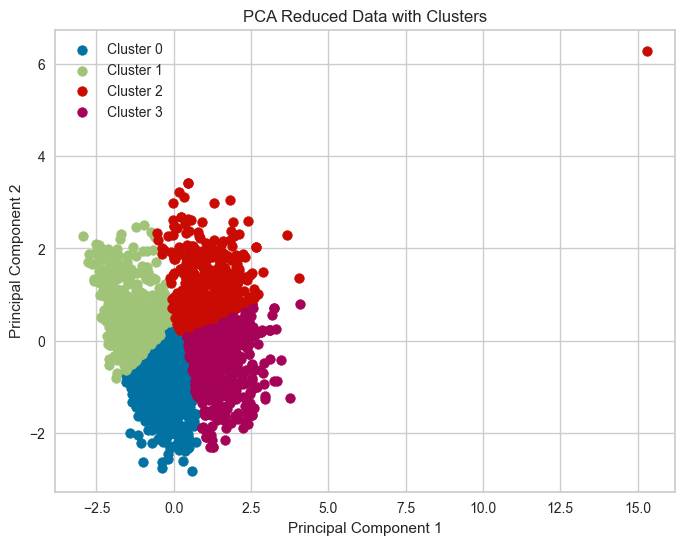

In [564]:
import matplotlib.pyplot as plt

# Scatter plot of all data points
plt.figure(figsize=(8, 6))

# Plot data points for each cluster
for i in range(kmeans.n_clusters):
    cluster_data = reduced_data[kmeans.labels_ == i]
    plt.scatter(cluster_data[:, 0], cluster_data[:, 1], s=50, label=f'Cluster {i}')

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA Reduced Data with Clusters')
plt.legend()
plt.grid(True)
plt.show()


In [566]:
User_input = pd.DataFrame([[0, 'Basic', 'Relationship', 30000.0,75000]], columns=['year_birth', 'education', 'marital_status', 'income','expenses'])

In [567]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
User_input['education'] = label_encoder.fit_transform(User_input['education'])
User_input['marital_status'] = label_encoder.fit_transform(User_input['marital_status'])

In [568]:
scaled_data = scaler.transform(User_input)

In [569]:
data=pca.transform(scaled_data)

In [571]:
kmeans.predict(data)

array([3], dtype=int32)

In [572]:
preds=kmeans.predict(reduced_data)

In [573]:
preds

array([3, 0, 2, ..., 2, 3, 0], dtype=int32)

In [557]:
clusters = cdf.copy()
clusters['Cluster'] = preds +1
clusters['Cluster'] = preds +1

In [529]:
clusters.to_csv("clusters.csv")

In [574]:
cluster_labels = kmeans.fit_predict(test)


In [575]:
silhouette_avg

0.5441173530915822